# Welcome to our fourth exercise! 

Today we will implement our first "real shaped" neural network.

In the previous lecture, we calculated the gradients of the weights in a fully connected layer.
We also mentioned how we can merge the biases into the weight matrix and make our lives easier.

So, let's put this knowledge to use!

Before we get started, we have to calculate something else, though. The lecture only covered what $\frac{\partial L}{\partial W}$ is.
We also need to know what $\frac{\partial L}{\partial X}$ or the downstream gradient is. 

<h3>Task: Derive</h3>

Get your hands dirty and show that: 

$$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} W^T$$

**Steps to Follow**:

1. Think back to the method we used last time.
2. Figure out what parts of the summ are always zero.
3. Show that the result is equal to the expression.

If things get a tricky, this [guide](http://cs231n.stanford.edu/handouts/linear-backprop.pdf) might come in handy.

<h3>Task: Check code</h3>
Check the code inside the <code>exercise_4/code/boiler_plate/network.py</code> file.

I have massively improved the <b>Network</b> class, which will be the base class of every layer we implement.

I also added a <b>FeedForwardNetwork</b> class, which will be the base class of the simple and convolutional networks that have multiple layers.

If you need to become more familiar with object-oriented programming, try to look up some concepts. The code you see uses many Python language features for creating real libraries. I made the code as reusable and practical as possible. 

Implementing neural networks is hard, so we must stay organized, use abstractions, and break up the problem into as many pieces as possible.

## We will implement the following network:

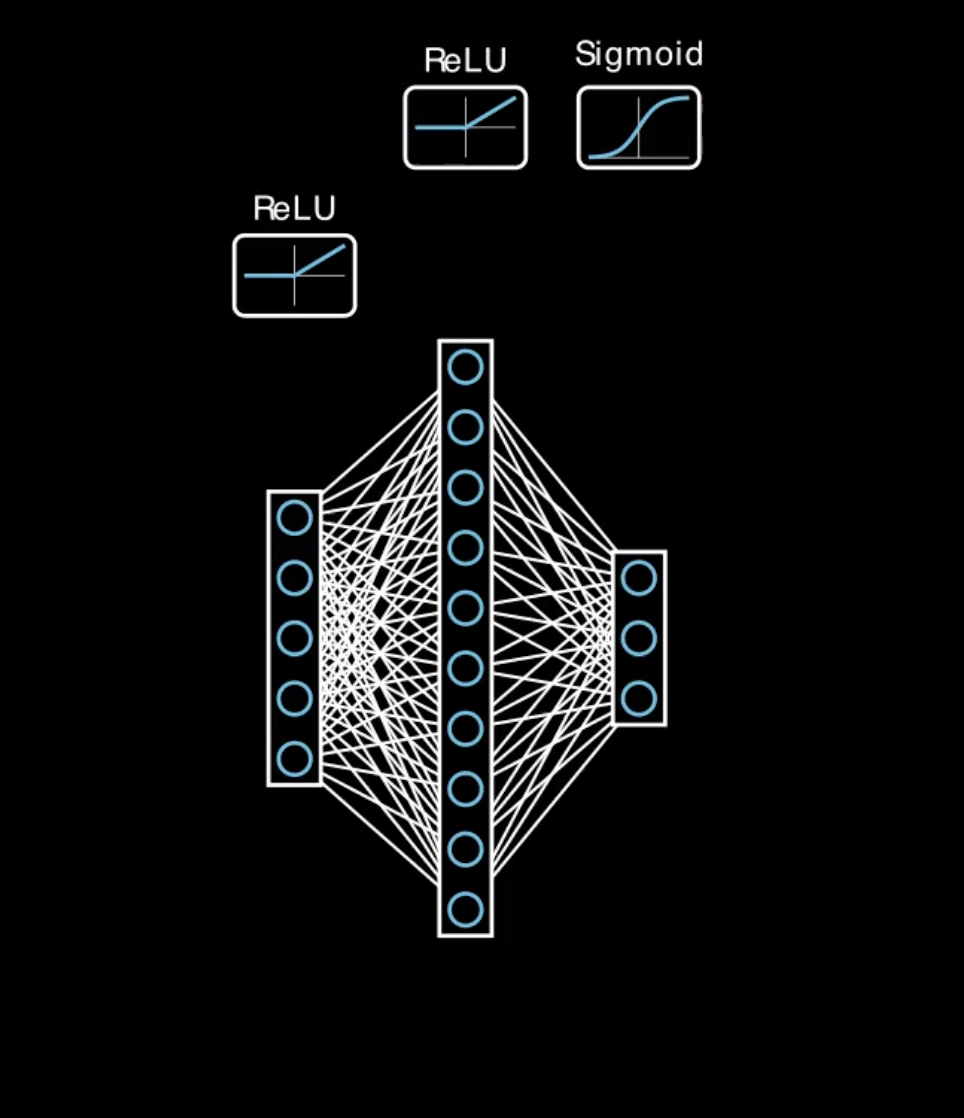

Take a look at the design above. Our network consists of 5 input neurons and 3 output neurons. I've also incorporated activation functions, gently ramping up the complexity for you.

For our exercise, we'll once again use artificial training data. However, today's twist: we'll let the network itself be our data generator.

Here's our game plan:

1. **Forward Passes**: We'll start by setting up the forward passes of the network.
2. **Weight Initialization**: Next, we'll initialize all weights to 1.
3. **Data Generation**: With the weights set, we'll create some random training data and run a forward pass to generate the corresponding labels.
4. **Backward Passes & Training**: After re-initializing the weights randomly, we'll work on the backward passes and proceed to train the model.

Let's get to it!

<h3>Task: Implement</h3>
Implement the forward pass in the <code>exercise_4/code/fully_connected.py</code> file.

FullyConnectedTest_Forward passed.


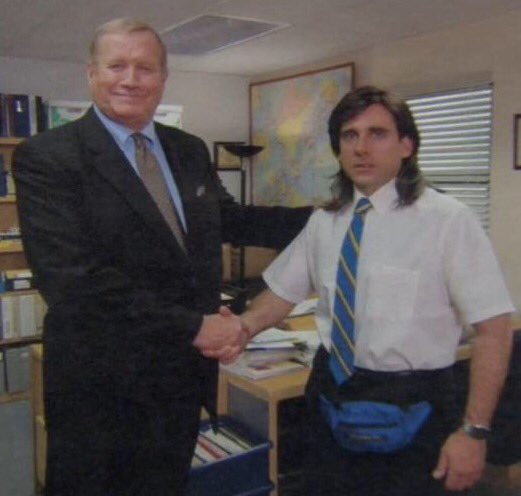

In [1]:
from tests.test import FullyConnectedTest_Forward,test_case_runner

test_classes = [FullyConnectedTest_Forward]
test_case_runner(test_classes)

## Generate some test data:

Before we build the whole network, let's ensure that our implementation for the fully connected layer is working.
So, we will create a dummy network that only consists of the input layer.

In [2]:
from code.fully_connected import FullyConnected
from code.boiler_plate.weight_initializer import OnesInitializer, OneBiasInitializer

input_size, output_size = 5, 10

dummy_model = FullyConnected(
            input_size, output_size, weight_strategy=OnesInitializer, bias_strategy=OneBiasInitializer
)
print(dummy_model)
print("Weights: \n", dummy_model.params["W"])

<Network(input_size=5, output_size=10, params_keys=['W'])>
Weights: 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [3]:
import numpy as np

# Generate 100 samples of input data
num_train_samples = 80
num_test_samples = 20

# We can calculate the value for all samples with one forward pass! Why?
X_train = np.random.randn(num_train_samples, input_size)
y_train = dummy_model.forward(X_train)

# Just so you get used to that in the real world, we have train and test datasets.
X_test = np.random.randn(num_test_samples, input_size)
y_test = dummy_model.forward(X_test)

print("Input sample: \n",X_train[0])
print("Corresponding lable: \n",y_train[0])
print("Correct value for all outputs should be: ", np.sum(X_train[0]) + 1)

Input sample: 
 [ 0.9970835  -1.45653117  0.2372343   1.19200323 -0.20444615]
Corresponding lable: 
 [1.7653437 1.7653437 1.7653437 1.7653437 1.7653437 1.7653437 1.7653437
 1.7653437 1.7653437 1.7653437]
Correct value for all outputs should be:  1.7653436957215467


<h3>Task: Implement</h3>
Implement the __next__ method in the <code>exercise_4/code/simple_dataset.py</code> file.


SimpleDatasetNextTest passed.


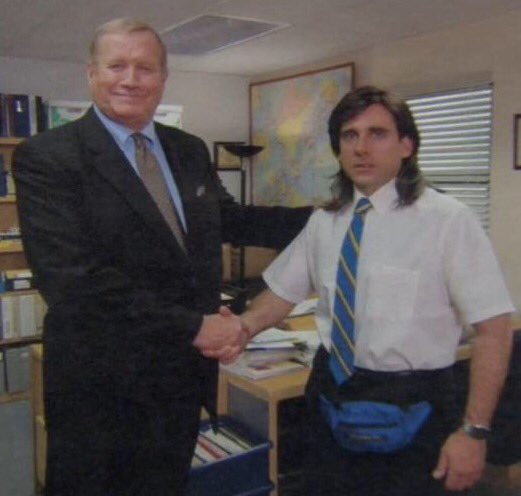

In [4]:
from tests.test import SimpleDatasetNextTest,test_case_runner

test_classes = [SimpleDatasetNextTest]
test_case_runner(test_classes)

In [5]:
from code.simple_dataset import SimpleDataset
from code.mse import MSE

batch_size = 8
train_data = {"x":X_train, "y":y_train}
train_dataset = SimpleDataset(data=train_data, minibatch=True, batch_size=batch_size)

test_data = {"x":X_test, "y":y_test}
test_dataset = SimpleDataset(data=test_data, minibatch=True, batch_size = num_test_samples)

print(test_dataset[0])
print(train_dataset[0])

(array([ 0.55122229, -0.1109719 , -0.2424495 , -0.17523433,  0.98194972]), array([2.00451629, 2.00451629, 2.00451629, 2.00451629, 2.00451629,
       2.00451629, 2.00451629, 2.00451629, 2.00451629, 2.00451629]))
(array([ 0.9970835 , -1.45653117,  0.2372343 ,  1.19200323, -0.20444615]), array([1.7653437, 1.7653437, 1.7653437, 1.7653437, 1.7653437, 1.7653437,
       1.7653437, 1.7653437, 1.7653437, 1.7653437]))


# Backpropagation!

<h3>Task: Implement</h3>
Implement the <b>backward</b> method in the <code>exercise_4/code/fully_connected.py</code> file.


In [6]:
from tests.test import FullyConnectedBackwardTest,test_case_runner

test_classes = [FullyConnectedBackwardTest]
test_case_runner(test_classes)

FullyConnectedBackwardTest failed due to exception: run a forward pass before the backward pass.


In [7]:
from code.mse import MSE

input_size, output_size = 5, 10
learning_rate = 0.01
EPOCHS = 4

model = FullyConnected(
    input_size=input_size, 
    output_size=output_size, 
    weight_strategy=None, # Randomly initialaze the weights 
    bias_strategy=None # Randomly initialaze the biases 
)

loss_function = MSE(output_size)

for epoch in range(EPOCHS):
    epoch_loss = 0 
    
    model.train()
    
    for data, label in train_dataset:

        predictions = model.forward(data)

        batch_loss = loss_function.forward(predictions, label)
        epoch_loss += batch_loss

         # Backward pass
        dloss = loss_function.backward(predictions, label)  # Gradients wrt output
        model.backward(dloss)  # Gradients wrt parameters

        # Gradient Descent Update
        model.params["W"] -= learning_rate * model.grads["W"]

    # Printing details
    average_epoch_loss = epoch_loss / len(train_dataset)  # Assuming len gives number of batches
    print(f"Epoch {epoch + 1}/{EPOCHS} - Loss: {average_epoch_loss:.4f}")


    

# Evaluation on Test Data
test_loss = 0
model.eval()
for data, label in test_dataset:
    predictions = model.forward(data)
    batch_loss = loss_function.forward(predictions, label)
    test_loss += batch_loss

average_test_loss = test_loss / len(test_dataset)
print(f"Final Test Loss: {average_test_loss:.4f}")

print("Training and Evaluation complete!")

Epoch 1/4 - Loss: 0.2535
Epoch 2/4 - Loss: 0.0101
Epoch 3/4 - Loss: 0.0005
Epoch 4/4 - Loss: 0.0000
Final Test Loss: 0.0000
Training and Evaluation complete!


<h3>Task: Check code</h3>
Check the code inside the <code>exercise_4/code/feed_forward.py</code> file.

In [8]:
# Implement the whole network
from code.feed_forward import FeedForwardNetwork
from code.boiler_plate.activation import ReLU, Sigmoid

input_size = 5
output_size = 3

full_network = FeedForwardNetwork(input_size, output_size)

full_network.add_layer(FullyConnected(5, 10, OnesInitializer, OneBiasInitializer))
full_network.add_layer(ReLU())
full_network.add_layer(FullyConnected(10,3,OnesInitializer, OneBiasInitializer))
full_network.add_layer(Sigmoid())
print(full_network)

<Network(input_size=5, output_size=10, params_keys=['W'])> -> <Activation(name=ReLU)> -> <Network(input_size=10, output_size=3, params_keys=['W'])> -> <Activation(name=Sigmoid)>


In [9]:
# Generate 100 samples of input data
X_train = np.random.randn(num_train_samples, input_size)
y_train = full_network.forward(X_train)

X_test = np.random.randn(num_test_samples, input_size)
y_test = full_network.forward(X_test)

print("Input sample: \n",X_train[0])
print("Corresponding label: \n",y_train[0]) # Everything is between 0 and 1 as it should be!

Input sample: 
 [-1.49073323  2.76298219 -0.33706166  0.23022141 -0.22891159]
Corresponding label: 
 [1. 1. 1.]


In [10]:
batch_size = 8
train_data = {"x":X_train, "y":y_train}
train_dataset = SimpleDataset(data=train_data, minibatch=True, batch_size=batch_size)

test_data = {"x":X_test, "y":y_test}
test_dataset = SimpleDataset(data=test_data, minibatch=True, batch_size = num_test_samples)

print(test_dataset[0])
print(train_dataset[0])

(array([-1.00029315, -1.13329361,  0.11582458,  0.12470646,  0.15135445]), array([0.73105858, 0.73105858, 0.73105858]))
(array([-1.49073323,  2.76298219, -0.33706166,  0.23022141, -0.22891159]), array([1., 1., 1.]))


Final Test Loss: 0.0008
Training and Evaluation complete!


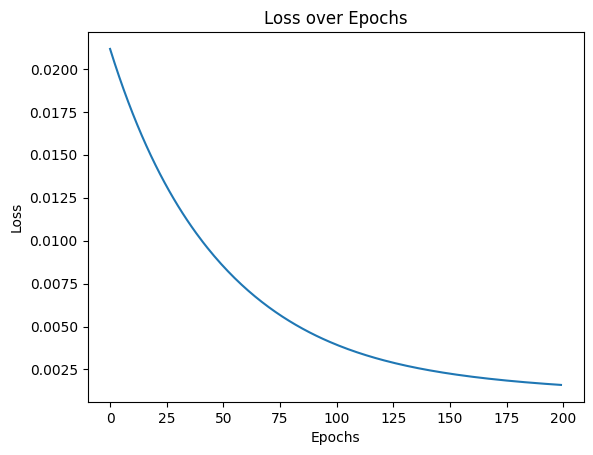

In [21]:
import matplotlib.pyplot as plt

input_size, output_size = 5, 10
learning_rate = 0.001
EPOCHS = 200

model = FeedForwardNetwork(input_size, output_size)

model.add_layer(FullyConnected(5,10))
model.add_layer(ReLU())
model.add_layer(FullyConnected(10,3))
model.add_layer(Sigmoid())

loss_function = MSE(output_size)

losses = []

for epoch in range(EPOCHS):
    epoch_loss = 0 
    
    model.train()
    
    for data, label in train_dataset:

        predictions = model.forward(data)

        batch_loss = loss_function.forward(predictions, label)
        epoch_loss += batch_loss

         # Backward pass
        dloss = loss_function.backward(predictions, label)  # Gradients wrt output
        model.backward(dloss)  # Gradients wrt parameters

        # Gradient Descent Update
        model.update_weights(learning_rate)
    
    # Printing details
    average_epoch_loss = epoch_loss / len(train_dataset)  # Assuming len gives number of batches
    losses.append(average_epoch_loss)
#     print(f"Epoch {epoch + 1}/{EPOCHS} - Loss: {average_epoch_loss:.4f}")


# Evaluation on Test Data
test_loss = 0
model.eval()
for data, label in test_dataset:
    predictions = model.forward(data)
    batch_loss = loss_function.forward(predictions, label)
    test_loss += batch_loss

average_test_loss = test_loss / len(test_dataset)
print(f"Final Test Loss: {average_test_loss:.4f}")

print("Training and Evaluation complete!")

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()